<a href="https://colab.research.google.com/github/etmcrae/Who-Got-DOGEd-/blob/main/Some_Analytics_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#bring in the merged_df file
!pip install pandas
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_cleaned = pd.read_csv('/content/drive/MyDrive/DOGE/df_cleaned.csv')
df_savings = pd.read_csv('/content/drive/MyDrive/DOGE/contracts.csv')
print("CSV file loaded successfully!")
df_cleaned.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-7-586367355.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('/content/drive/MyDrive/DOGE/df_cleaned.csv')


CSV file loaded successfully!


award_id_piid  total_dollars_obligated  potential_total_value_of_award  \
0  47QSWA20D0092                      0.0                        500000.0   
1  47QRAA24D006P                      0.0                        500000.0   
2  47QTCA20D008C                      0.0                       4000000.0   
3  47QTCA23D0009                      0.0                       7600000.0   
4     GS33F004DA                      0.0                        450000.0   

  period_of_performance_start_date ordering_period_end_date  \
0                       2020-08-15               2025-08-14   
1                       2024-04-17               2029-04-16   
2                       2020-04-01               2030-03-31   
3                       2022-10-07               2027-10-06   
4                       2015-11-03               2025-11-02   

              awarding_agency_name     awarding_sub_agency_name  \
0  General Services Administration  Federal Acquisition Service   
1  General Services Administration  Federal Acquisition Service   
2  General Services Administration  Federal Acquisition Service   
3  General Services Administration  Federal Acquisition Service   
4  General Services Administration  Federal Acquisition Service   

               funding_agency_name      funding_sub_agency_name  \
0  General Services Administration  Federal Acquisition Service   
1  General Services Administration  Federal Acquisition Service   
2  General Services Administration  Federal Acquisition Service   
3  General Services Administration  Federal Acquisition Service   
4  General Services Administration  Federal Acquisition Service   

  foreign_funding  ... last_modified_date         piid       agency  \
0               X  ...         2025-05-03  Unspecified  Unspecified   
1               X  ...         2025-05-03  Unspecified  Unspecified   
2               X  ...         2025-05-03  Unspecified  Unspecified   
3               X  ...         2025-05-03  Unspecified  Unspecified   
4               X  ...         2025-05-03  Unspecified  Unspecified   

        vendor        value  description  fpds_status    fpds_link  \
0  Unspecified  Unspecified  Unspecified  Unspecified  Unspecified   
1  Unspecified  Unspecified  Unspecified  Unspecified  Unspecified   
2  Unspecified  Unspecified  Unspecified  Unspecified  Unspecified   
3  Unspecified  Unspecified  Unspecified  Unspecified  Unspecified   
4  Unspecified  Unspecified  Unspecified  Unspecified  Unspecified   

  deleted_date      savings  
0  Unspecified  Unspecified  
1  Unspecified  Unspecified  
2  Unspecified  Unspecified  
3  Unspecified  Unspecified  
4  Unspecified  Unspecified  

[5 rows x 142 columns]

In [10]:
df_savings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   piid          11042 non-null  object 
 1   agency        11042 non-null  object 
 2   vendor        11030 non-null  object 
 3   value         11042 non-null  float64
 4   description   11037 non-null  object 
 5   fpds_status   11042 non-null  object 
 6   fpds_link     10873 non-null  object 
 7   deleted_date  11042 non-null  object 
 8   savings       11042 non-null  float64
dtypes: float64(2), object(7)
memory usage: 776.5+ KB


In [7]:
df_copy = df_cleaned.copy()
for i, col in enumerate(df_copy.columns):
  print(f"Index: {i}, Column: {col}")

Index: 0, Column: award_id_piid
Index: 1, Column: total_dollars_obligated
Index: 2, Column: potential_total_value_of_award
Index: 3, Column: period_of_performance_start_date
Index: 4, Column: ordering_period_end_date
Index: 5, Column: awarding_agency_name
Index: 6, Column: awarding_sub_agency_name
Index: 7, Column: funding_agency_name
Index: 8, Column: funding_sub_agency_name
Index: 9, Column: foreign_funding
Index: 10, Column: recipient_name
Index: 11, Column: cage_code
Index: 12, Column: recipient_country_name
Index: 13, Column: recipient_address_line_1
Index: 14, Column: recipient_city_name
Index: 15, Column: recipient_county_name
Index: 16, Column: prime_award_transaction_recipient_state_fips_code
Index: 17, Column: recipient_state_code
Index: 18, Column: recipient_state_name
Index: 19, Column: recipient_zip_4_code
Index: 20, Column: recipient_phone_number
Index: 21, Column: naics_code
Index: 22, Column: naics_description
Index: 23, Column: small_business_competitiveness_demonstrat

In [8]:
# selecting columns to keep by index from df_copy
columns_to_keep_indices = [0, 1, 4, 5, 7, 9, 10, 12, 13, 14, 15] + list(range(17, 120)) + [133] + [141]
df_copy = df_copy.iloc[:, columns_to_keep_indices]
df_copy.head()

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   

  recipient_country_name  recipient_address_line_1 recipient_city_name  ...  \
0          UNITED STATES     8409 S RANCH ROAD 783           KERRVILLE  ...   
1          UNITED STATES       1304 W ROSEBURG AVE             MODESTO  ...   
2          UNITED STATES  2727 ULMERTON RD STE 310          CLEARWATER  ...   
3          UNITED STATES         12040 PARKGATE DR          NOKESVILLE  ...   
4          UNITED STATES       3200 N RIVERSIDE DR         INDIALANTIC  ...   

  school_of_forestry veterinary_college dot_certified_disadvantage  \
0                  0                  0                          0   
1                  0                  0                          0   
2                  0                  0                          0   
3                  0                  0                          0   
4                  0                  0                          0   

  self_certified_small_disadvantaged_business small_disadvantaged_business  \
0                                           0                            0   
1                                           1                            0   
2                                           0                            0   
3                                           0                            0   
4                                           0                            0   

  c8a_program_participant  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   

  historically_underutilized_business_zone_hubzone_firm  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   sba_certified_8a_joint_venture         piid      savings  
0                               0  Unspecified  Unspecified  
1                               0  Unspecified  Unspecified  
2                               0  Unspecified  Unspecified  
3                               0  Unspecified  Unspecified  
4                               0  Unspecified  Unspecified  

[5 rows x 116 columns]

In [9]:
for col in df_copy:
  print(col)

award_id_piid
total_dollars_obligated
ordering_period_end_date
awarding_agency_name
funding_agency_name
foreign_funding
recipient_name
recipient_country_name
recipient_address_line_1
recipient_city_name
recipient_county_name
recipient_state_code
recipient_state_name
recipient_zip_4_code
recipient_phone_number
naics_code
naics_description
small_business_competitiveness_demonstration_program
labor_standards
construction_wage_rate_requirements
interagency_contracting_authority
cost_accounting_standards_clause
performance_based_service_acquisition
multi_year_contract_code
contingency_humanitarian_or_peacekeeping_operation
alaskan_native_corporation_owned_firm
american_indian_owned_business
indian_tribe_federally_recognized
native_hawaiian_organization_owned_firm
tribally_owned_firm
veteran_owned_business
service_disabled_veteran_owned_business
woman_owned_business
women_owned_small_business
economically_disadvantaged_women_owned_small_business
joint_venture_women_owned_small_business
joint

In [10]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [11]:
#add flag column
df_copy['DOGE_Flag'] = df_copy['piid'].apply(lambda x: 0 if 'unspecified' in x.lower() else 1)
df_copy.head(10)

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   
5  47QTCA19D0063                      0.0               2029-02-18   
6     GS03F060AA                      0.0               2028-03-31   
7  47QTCA23D00EN                      0.0               2028-09-25   
8  47QRAA24D00CT                      0.0               2029-08-21   
9  47QSWA22D0036                      0.0               2027-02-10   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   
5  General Services Administration  General Services Administration   
6  General Services Administration  General Services Administration   
7  General Services Administration  General Services Administration   
8  General Services Administration  General Services Administration   
9  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   
5               X                                   FALCON LOGIC LLC   
6               X                                      APISOURCE INC   
7               X                                        AXUMFED LLC   
8               X                           TOLAND MIZELL MOLNAR LLC   
9               X                                 PFC SAFEGUARDS LLC   

  recipient_country_name           recipient_address_line_1  \
0          UNITED STATES              8409 S RANCH ROAD 783   
1          UNITED STATES                1304 W ROSEBURG AVE   
2          UNITED STATES           2727 ULMERTON RD STE 310   
3          UNITED STATES                  12040 PARKGATE DR   
4          UNITED STATES                3200 N RIVERSIDE DR   
5          UNITED STATES               2452 RIDGEHAMPTON CT   
6          UNITED STATES             7850 WALKER DR STE 400   
7          UNITED STATES  1765 GREENSBORO STATION PL 9TH FL   
8          UNITED STATES            512 MEANS ST NW STE 400   
9          UNITED STATES           2960 E SUNSET RD STE 125   

  recipient_city_name recipient_county_name recipient_state_code  \
0           KERRVILLE             GILLESPIE                   TX   
1             MODESTO            STANISLAUS                   CA   
2          CLEARWATER              PINELLAS                   FL   
3          NOKESVILLE        PRINCE WILLIAM                   VA   
4         INDIALANTIC               BREVARD                   FL   
5              RESTON               FAIRFAX                   VA   
6           GREENBELT       PRINCE GEORGE'S                   MD   
7              MCLEAN               FAIRFAX                   VA   
8             ATLANTA                FULTON                   GA   
9           LAS VEGAS                 CLARK                   NV   

  recipient_state_name recipient_zip_4_code recipient_phone_number naics_code  \
0                TEXAS            780281821           5125631737.0   311423.0   
1           CALIFORNIA            953504855         

In [12]:
#add political leaning of the governor for the state by table. Data source: https://www.britannica.com/place/current-US-governors-22372
data = {'State': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
        'Party': ['Republican', 'Republican', 'Democratic', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Republican', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Republican', 'Democratic', 'Republican'],
       }

df_states = pd.DataFrame(data)
df_states

State       Party
0     AL  Republican
1     AK  Republican
2     AZ  Democratic
3     AR  Republican
4     CA  Democratic
5     CO  Democratic
6     CT  Democratic
7     DE  Democratic
8     FL  Republican
9     GA  Republican
10    HI  Democratic
11    ID  Republican
12    IL  Democratic
13    IN  Republican
14    IA  Republican
15    KS  Democratic
16    KY  Democratic
17    LA  Republican
18    ME  Democratic
19    MD  Democratic
20    MA  Democratic
21    MI  Democratic
22    MN  Democratic
23    MS  Republican
24    MO  Republican
25    MT  Republican
26    NE  Republican
27    NV  Republican
28    NH  Republican
29    NJ  Democratic
30    NM  Democratic
31    NY  Democratic
32    NC  Democratic
33    ND  Republican
34    OH  Republican
35    OK  Republican
36    OR  Democratic
37    PA  Democratic
38    RI  Democratic
39    SC  Republican
40    SD  Republican
41    TN  Republican
42    TX  Republican
43    UT  Republican
44    VT  Republican
45    VA  Republican
46    WA  Democratic
47    WV  Republican
48    WI  Democratic
49    WY  Republican

In [13]:
#join df_states onto df_copy where State = recipient_state_code

df_merged = pd.merge(df_copy, df_states, left_on='recipient_state_code', right_on='State', how='left')
df_merged.head()
df_merged.columns
for col in df_merged:
  print(col)
df_merged.head()

award_id_piid
total_dollars_obligated
ordering_period_end_date
awarding_agency_name
funding_agency_name
foreign_funding
recipient_name
recipient_country_name
recipient_address_line_1
recipient_city_name
recipient_county_name
recipient_state_code
recipient_state_name
recipient_zip_4_code
recipient_phone_number
naics_code
naics_description
small_business_competitiveness_demonstration_program
labor_standards
construction_wage_rate_requirements
interagency_contracting_authority
cost_accounting_standards_clause
performance_based_service_acquisition
multi_year_contract_code
contingency_humanitarian_or_peacekeeping_operation
alaskan_native_corporation_owned_firm
american_indian_owned_business
indian_tribe_federally_recognized
native_hawaiian_organization_owned_firm
tribally_owned_firm
veteran_owned_business
service_disabled_veteran_owned_business
woman_owned_business
women_owned_small_business
economically_disadvantaged_women_owned_small_business
joint_venture_women_owned_small_business
joint

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   

  recipient_country_name  recipient_address_line_1 recipient_city_name  \
0          UNITED STATES     8409 S RANCH ROAD 783           KERRVILLE   
1          UNITED STATES       1304 W ROSEBURG AVE             MODESTO   
2          UNITED STATES  2727 ULMERTON RD STE 310          CLEARWATER   
3          UNITED STATES         12040 PARKGATE DR          NOKESVILLE   
4          UNITED STATES       3200 N RIVERSIDE DR         INDIALANTIC   

  recipient_county_name recipient_state_code recipient_state_name  \
0             GILLESPIE                   TX                TEXAS   
1            STANISLAUS                   CA           CALIFORNIA   
2              PINELLAS                   FL              FLORIDA   
3        PRINCE WILLIAM                   VA             VIRGINIA   
4               BREVARD                   FL              FLORIDA   

  recipient_zip_4_code recipient_phone_number naics_code  \
0            780281821           5125631737.0   311423.0   
1            953504855           2093431925.0   541810.0   
2            337625322           7275711141.0   541511.0   
3            201812718           5712616093.0   541511.0   
4            329034407           3219602445.0   481219.0   

                         naics_description  \
0  DRIED AND DEHYDRATED FOOD MANUFACTURING   
1                     ADVERTISING AGENCIES   
2     CUSTOM COMPUTER PROGRAMMING SERVICES   
3     CUSTOM COMPUTER PROGRAMMING SERVICES   
4    OTHER NONSCHEDULED AIR TRANSPORTATION   

   small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599406 entries, 0 to 599405
Columns: 119 entries, award_id_piid to Party
dtypes: float64(1), int64(88), object(30)
memory usage: 544.2+ MB


In [15]:
#adding a column called Red State and have the values be 1 if Party = Republican. If Party = Democrat than 0. else 0

df_merged['Red State'] = df_merged['Party'].apply(lambda x: 1 if x == 'Republican' else 0)
df_merged.head()

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   

  recipient_country_name  recipient_address_line_1 recipient_city_name  \
0          UNITED STATES     8409 S RANCH ROAD 783           KERRVILLE   
1          UNITED STATES       1304 W ROSEBURG AVE             MODESTO   
2          UNITED STATES  2727 ULMERTON RD STE 310          CLEARWATER   
3          UNITED STATES         12040 PARKGATE DR          NOKESVILLE   
4          UNITED STATES       3200 N RIVERSIDE DR         INDIALANTIC   

  recipient_county_name recipient_state_code recipient_state_name  \
0             GILLESPIE                   TX                TEXAS   
1            STANISLAUS                   CA           CALIFORNIA   
2              PINELLAS                   FL              FLORIDA   
3        PRINCE WILLIAM                   VA             VIRGINIA   
4               BREVARD                   FL              FLORIDA   

  recipient_zip_4_code recipient_phone_number naics_code  \
0            780281821           5125631737.0   311423.0   
1            953504855           2093431925.0   541810.0   
2            337625322           7275711141.0   541511.0   
3            201812718           5712616093.0   541511.0   
4            329034407           3219602445.0   481219.0   

                         naics_description  \
0  DRIED AND DEHYDRATED FOOD MANUFACTURING   
1                     ADVERTISING AGENCIES   
2     CUSTOM COMPUTER PROGRAMMING SERVICES   
3     CUSTOM COMPUTER PROGRAMMING SERVICES   
4    OTHER NONSCHEDULED AIR TRANSPORTATION   

   small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE

In [18]:
# prompt: convert the ordering_period_end_date to a date field

df_merged['ordering_period_end_date'] = pd.to_datetime(df_merged['ordering_period_end_date'], errors='coerce')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599406 entries, 0 to 599405
Columns: 120 entries, award_id_piid to Red State
dtypes: datetime64[ns](1), float64(1), int64(89), object(29)
memory usage: 548.8+ MB


In [19]:
df_merged.head()

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   

  recipient_country_name  recipient_address_line_1 recipient_city_name  \
0          UNITED STATES     8409 S RANCH ROAD 783           KERRVILLE   
1          UNITED STATES       1304 W ROSEBURG AVE             MODESTO   
2          UNITED STATES  2727 ULMERTON RD STE 310          CLEARWATER   
3          UNITED STATES         12040 PARKGATE DR          NOKESVILLE   
4          UNITED STATES       3200 N RIVERSIDE DR         INDIALANTIC   

  recipient_county_name recipient_state_code recipient_state_name  \
0             GILLESPIE                   TX                TEXAS   
1            STANISLAUS                   CA           CALIFORNIA   
2              PINELLAS                   FL              FLORIDA   
3        PRINCE WILLIAM                   VA             VIRGINIA   
4               BREVARD                   FL              FLORIDA   

  recipient_zip_4_code recipient_phone_number naics_code  \
0            780281821           5125631737.0   311423.0   
1            953504855           2093431925.0   541810.0   
2            337625322           7275711141.0   541511.0   
3            201812718           5712616093.0   541511.0   
4            329034407           3219602445.0   481219.0   

                         naics_description  \
0  DRIED AND DEHYDRATED FOOD MANUFACTURING   
1                     ADVERTISING AGENCIES   
2     CUSTOM COMPUTER PROGRAMMING SERVICES   
3     CUSTOM COMPUTER PROGRAMMING SERVICES   
4    OTHER NONSCHEDULED AIR TRANSPORTATION   

   small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE

In [20]:
# remove all rows from the df_merged where DOGE_Flag = 0 AND ordering_period_end_date = before 2025-01-01

df_merged = df_merged[~((df_merged['DOGE_Flag'] == 0) & (df_merged['ordering_period_end_date'] < '2025-01-01'))]
df_merged.head()
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Index: 598656 entries, 0 to 599405
Columns: 120 entries, award_id_piid to Red State
dtypes: datetime64[ns](1), float64(1), int64(89), object(29)
memory usage: 552.7+ MB


In [21]:
#dropping columns except those which appear to be booleans in a copy

df_contracts_bool = df_cleaned.copy()
bool_cols = [col for col in df_contracts_bool.columns if df_contracts_bool[col].nunique() <= 2]
df_contracts_bool = df_contracts_bool[bool_cols]

print("\nDataFrame with only potentially boolean columns:")
print(df_contracts_bool.info())
print(df_contracts_bool.head())


DataFrame with only potentially boolean columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599406 entries, 0 to 599405
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count   Dtype
---  ------                                                      --------------   -----
 0   small_business_competitiveness_demonstration_program        599406 non-null  int64
 1   alaskan_native_corporation_owned_firm                       599406 non-null  int64
 2   american_indian_owned_business                              599406 non-null  int64
 3   indian_tribe_federally_recognized                           599406 non-null  int64
 4   native_hawaiian_organization_owned_firm                     599406 non-null  int64
 5   tribally_owned_firm                                         599406 non-null  int64
 6   veteran_owned_business                                      599406 non-null  int64
 7   service_disabled_veteran_owned_business   

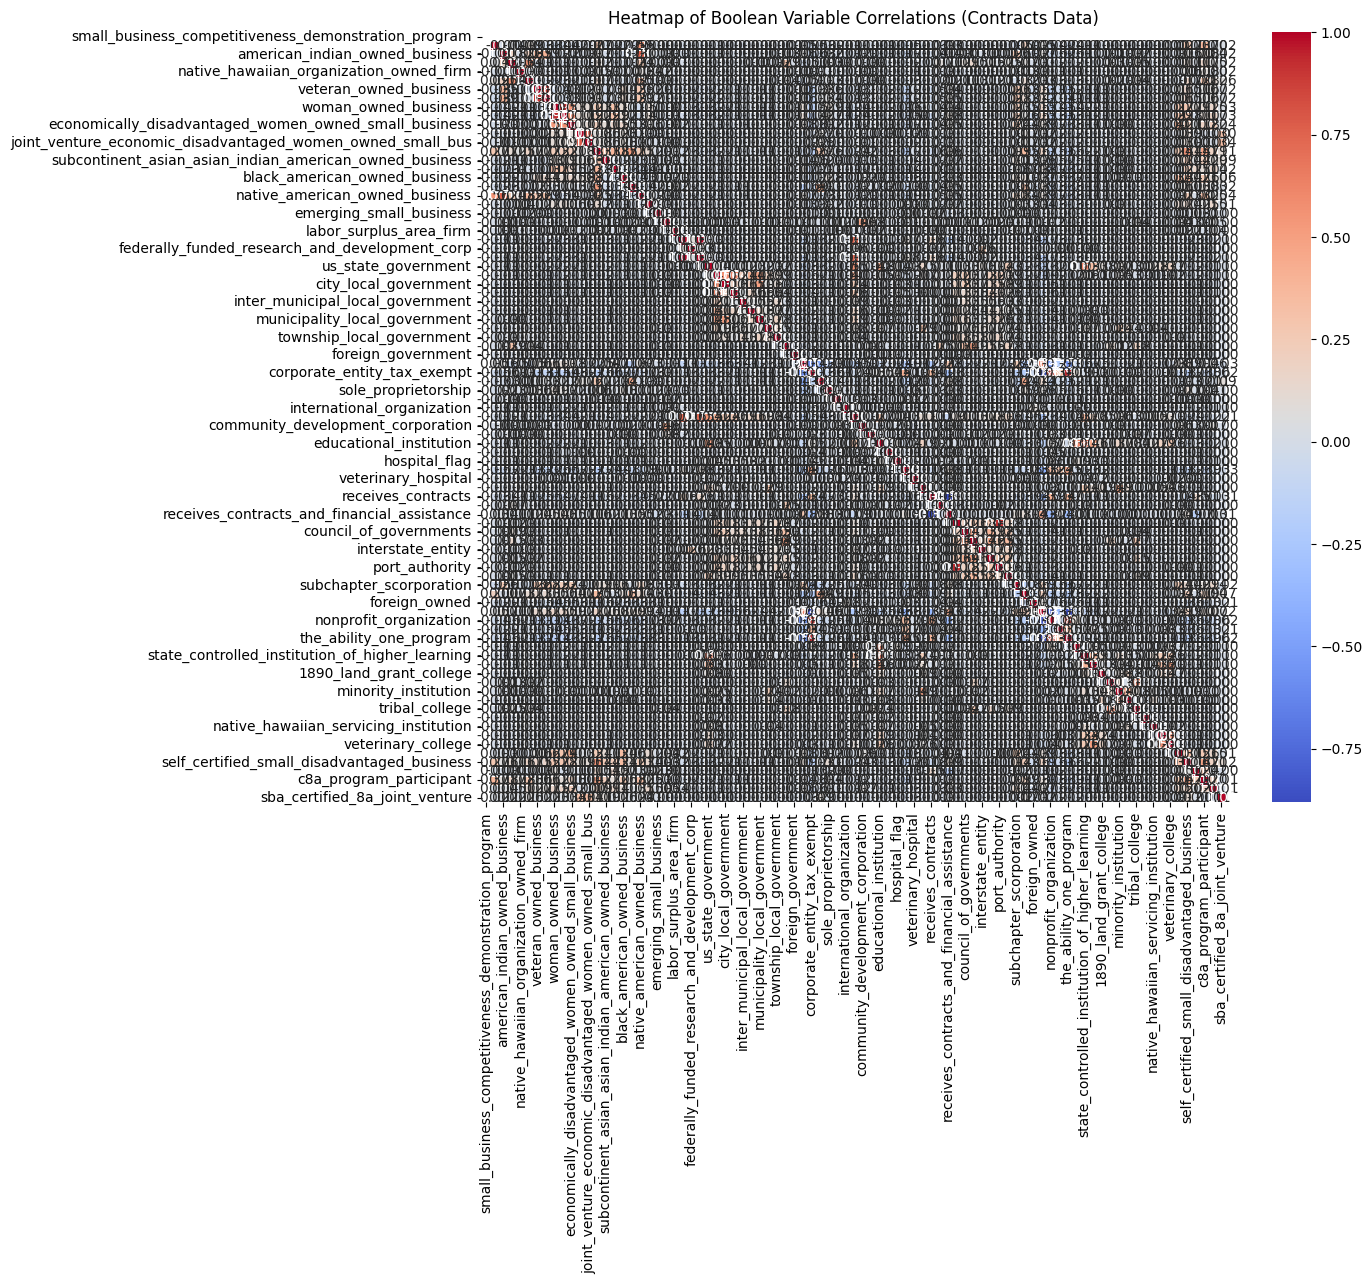

In [22]:
# heat map of all varirables from df_contracts_bool with table sorting

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_contracts_bool.corr()

#sorting
corr_matrix_sorted = corr_matrix.sort_values(by=corr_matrix.columns[0], ascending=False)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Boolean Variable Correlations (Contracts Data)')
plt.show()

In [23]:
df_contracts_bool = df_cleaned.copy()
bool_cols = [col for col in df_contracts_bool.columns if df_contracts_bool[col].nunique() <= 2]
df_contracts_bool = df_contracts_bool[bool_cols]

print("\nDataFrame with only potentially boolean columns:")
print(df_contracts_bool.info())
print(df_contracts_bool.head())


DataFrame with only potentially boolean columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599406 entries, 0 to 599405
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count   Dtype
---  ------                                                      --------------   -----
 0   small_business_competitiveness_demonstration_program        599406 non-null  int64
 1   alaskan_native_corporation_owned_firm                       599406 non-null  int64
 2   american_indian_owned_business                              599406 non-null  int64
 3   indian_tribe_federally_recognized                           599406 non-null  int64
 4   native_hawaiian_organization_owned_firm                     599406 non-null  int64
 5   tribally_owned_firm                                         599406 non-null  int64
 6   veteran_owned_business                                      599406 non-null  int64
 7   service_disabled_veteran_owned_business   

In [24]:
corr_series = corr_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.95 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index(['us_federal_government', 'federal_agency'], dtype='object')

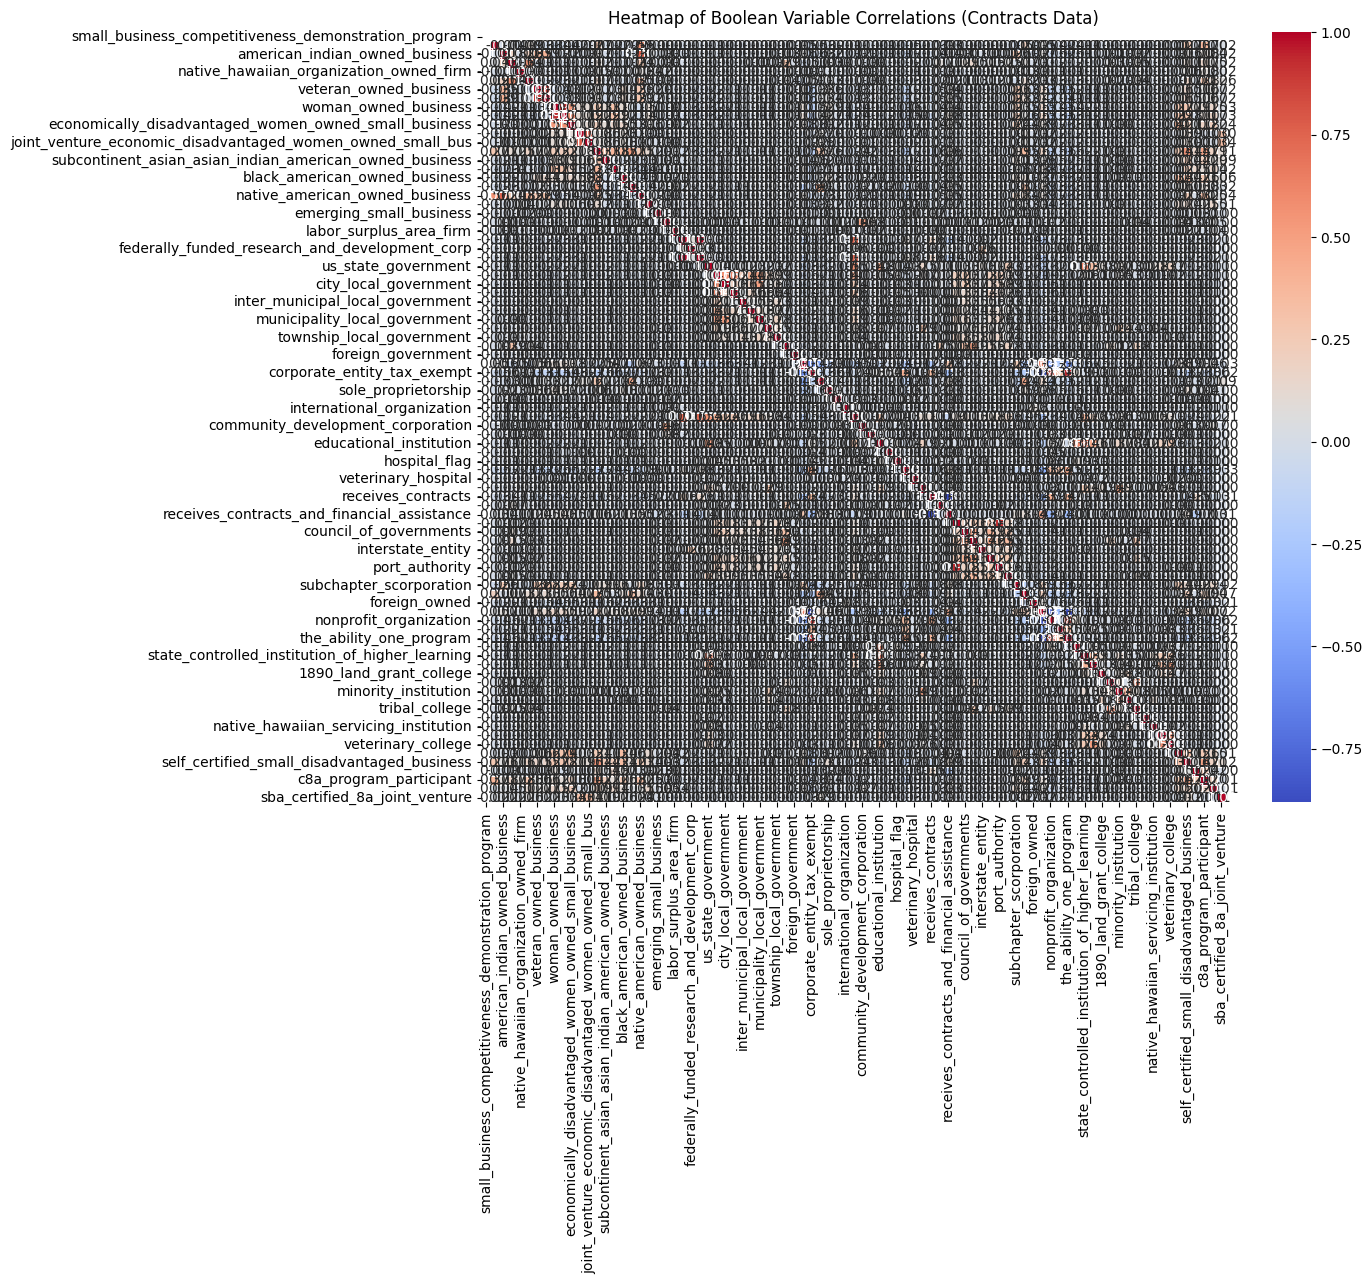

In [25]:
# heat map of all varirables from df_contracts_bool with table sorting

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Calculate the correlation matrix
# Convert columns to numeric, coercing errors to NaN
for col in df_contracts_bool.columns:
    # Attempt to convert the column to numeric. If it fails (e.g., due to 'Unspecified'),
    # those values will be replaced with NaN.
    df_contracts_bool[col] = pd.to_numeric(df_contracts_bool[col], errors='coerce')

# Drop columns that became all NaN after coercion, as they cannot be used in correlation
df_contracts_bool = df_contracts_bool.dropna(axis=1, how='all')

# Now calculate the correlation matrix on the numeric DataFrame
# Drop rows with any NaN values that were introduced by coercion
corr_matrix = df_contracts_bool.dropna().corr()


#sorting
# Check if the corr_matrix is not empty before sorting
if not corr_matrix.empty:
    corr_matrix_sorted = corr_matrix.sort_values(by=corr_matrix.columns[0], ascending=False)

    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Heatmap of Boolean Variable Correlations (Contracts Data)')
    plt.show()
else:
    print("Correlation matrix is empty after handling non-numeric values and NaNs.")

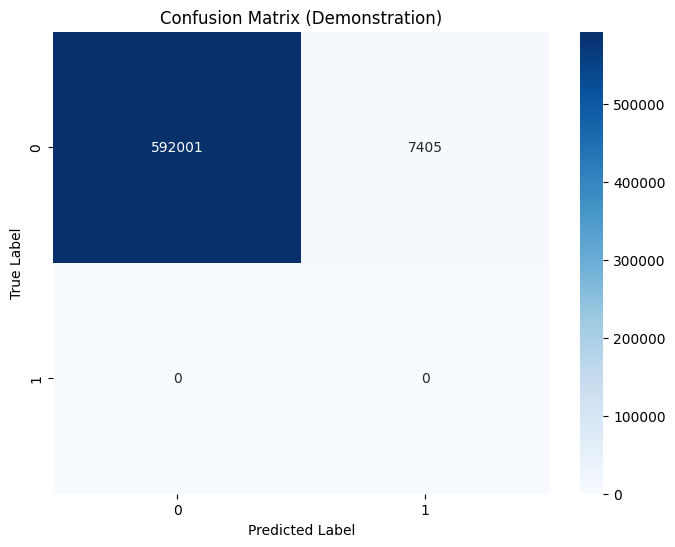


Sorted Correlation Table (Highest to Lowest Absolute Correlation):
                                Variable 1  \
1916                 us_federal_government   
2086                        federal_agency   
3249           corporate_entity_tax_exempt   
5799               the_ability_one_program   
4703                     airport_authority   
...                                    ...   
2914             township_local_government   
6526                        tribal_college   
6611  alaskan_native_servicing_institution   
6608  alaskan_native_servicing_institution   
6268               1994_land_grant_college   

                                Variable 2  Correlation  
1916                        federal_agency     0.996503  
2086                 us_federal_government     0.996503  
3249               the_ability_one_program     0.934151  
5799           corporate_entity_tax_exempt     0.934151  
4703                        port_authority     0.924952  
...                            

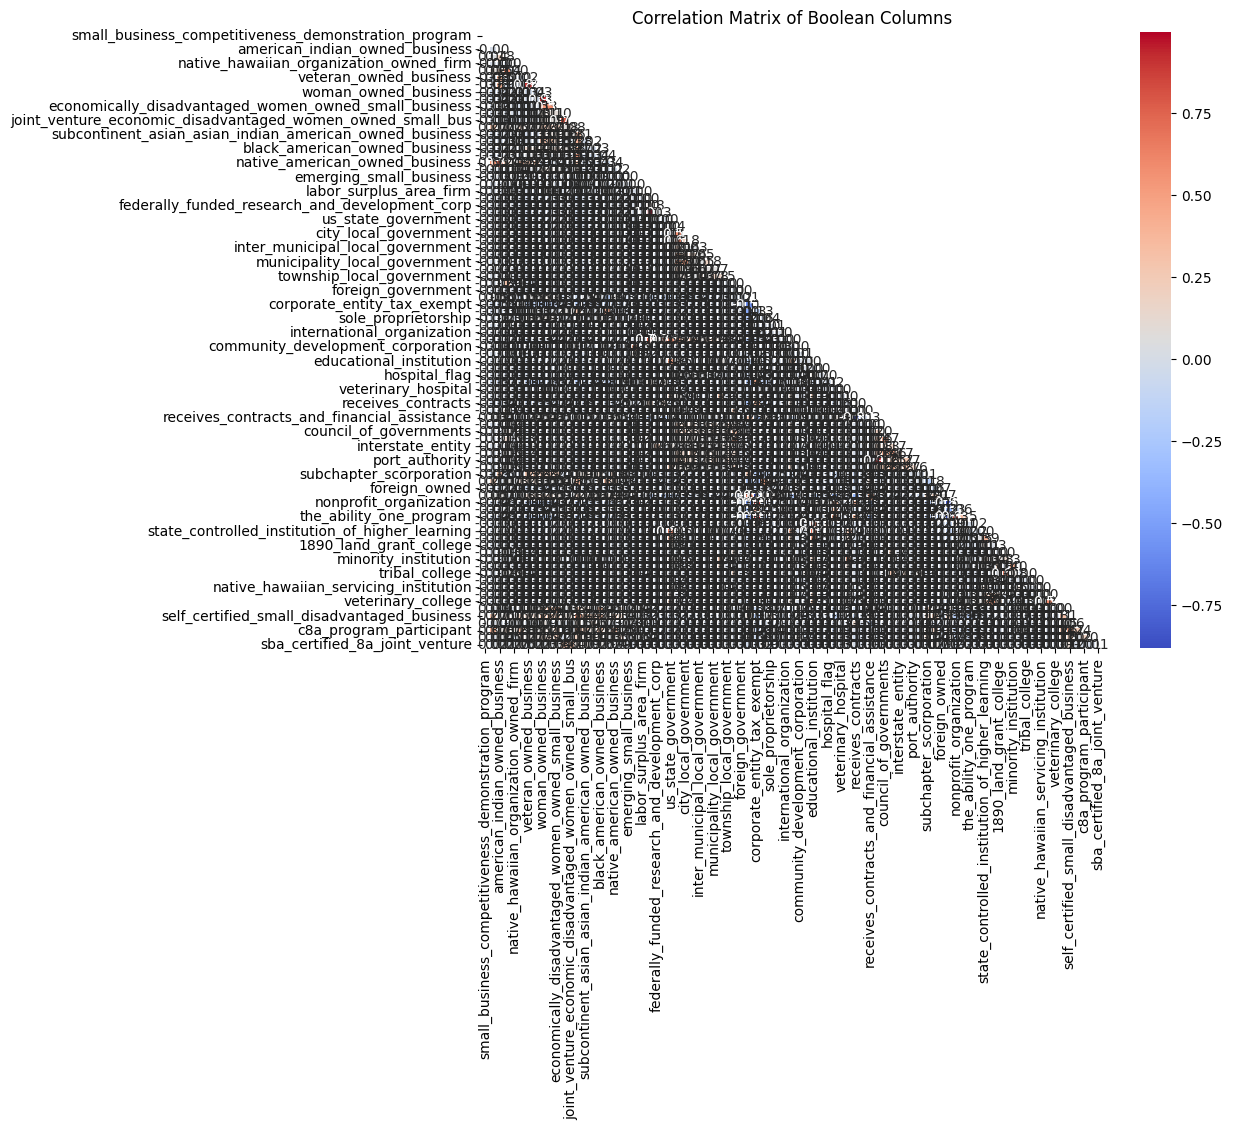

In [26]:
# confusion matrix with table showing sorted correlation

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


if df_contracts_bool.shape[1] >= 2:

    actual_values = df_contracts_bool.iloc[:, 0].astype(str) # Ensure string type for labels
    predicted_values = df_contracts_bool.iloc[:, 1].astype(str) # Ensure string type for labels

    # Get unique labels from both actual and predicted to ensure all labels are included in the matrix
    labels = sorted(list(set(actual_values.unique()) | set(predicted_values.unique())))

    # Generate confusion matrix
    cm = confusion_matrix(actual_values, predicted_values, labels=labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Demonstration)')
    plt.show()
else:
    print("DataFrame has less than 2 columns. Cannot generate a confusion matrix with a target and prediction.")


# Calculate the correlation matrix
correlation_matrix = df_contracts_bool.corr()

# Stack the correlation matrix to easily sort it
stacked_corr = correlation_matrix.stack()

# Convert to a DataFrame for easier handling
stacked_corr_df = stacked_corr.reset_index()
stacked_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter out self-correlations (correlation of a variable with itself is always 1)
stacked_corr_df = stacked_corr_df[stacked_corr_df['Variable 1'] != stacked_corr_df['Variable 2']]

# Sort by the absolute value of correlation in descending order
sorted_corr = stacked_corr_df.reindex(stacked_corr_df.Correlation.abs().sort_values(ascending=False).index)

# Print the sorted correlation table
print("\nSorted Correlation Table (Highest to Lowest Absolute Correlation):")
print(sorted_corr)

# Optional: Display only the upper triangle of the correlation matrix for better readability (without duplicates)
# Initialize a matrix to be plotted, with the same shape as the original correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, linewidths=.5)
plt.title('Correlation Matrix of Boolean Columns')
plt.show()


In [27]:
print(df_merged.head().T.to_string(index=True))

                                                                                                  0                                 1                                                           2                                     3                                      4
award_id_piid                                                                         47QSWA20D0092                     47QRAA24D006P                                               47QTCA20D008C                         47QTCA23D0009                             GS33F004DA
total_dollars_obligated                                                                         0.0                               0.0                                                         0.0                                   0.0                                    0.0
ordering_period_end_date                                                        2025-08-14 00:00:00               2029-04-16 00:00:00                                         2030-03-31 00


Sorted Correlation with DOGE_Flag (Highest to Lowest):
c8a_program_participant                                       0.075963
self_certified_small_disadvantaged_business                   0.057341
black_american_owned_business                                 0.053763
educational_institution                                       0.049991
minority_owned_business                                       0.049297
woman_owned_business                                          0.037820
state_controlled_institution_of_higher_learning               0.036703
subcontinent_asian_asian_indian_american_owned_business       0.036307
limited_liability_corporation                                 0.035362
economically_disadvantaged_women_owned_small_business         0.035304
women_owned_small_business                                    0.034904
private_university_or_college                                 0.032318
dot_certified_disadvantage                                    0.030054
tribally_owned_firm  

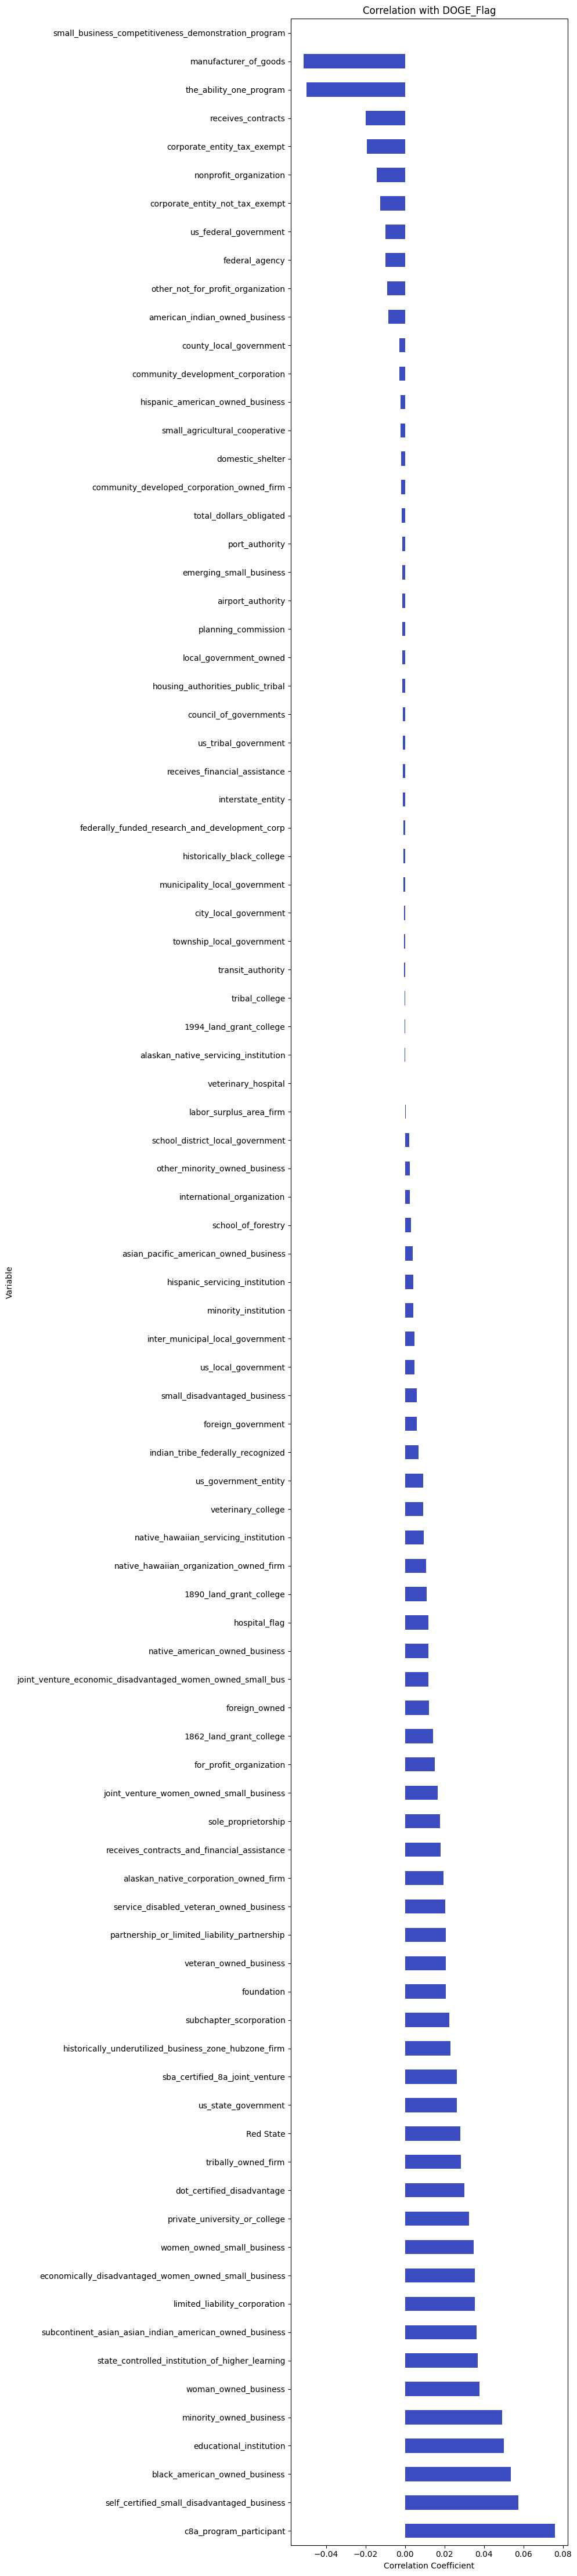

In [28]:
# prompt: from the boolean correlatoin, print a sorted list of highest to lowest correlation with DOGE_Flag

# Assuming 'DOGE_Flag' is already created in df_merged from the previous step
# If not, you would need to create it first:
# df_merged['DOGE_Flag'] = df_merged['piid'].apply(lambda x: 0 if 'unspecified' in x.lower() else 1)

# Select only numeric columns for correlation, including the newly added 'Red State'
# and assuming 'DOGE_Flag' is also numeric (0 or 1)
numeric_cols = df_merged.select_dtypes(include=np.number).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix_merged = df_merged[numeric_cols].corr()

# Check if 'DOGE_Flag' is in the correlation matrix
if 'DOGE_Flag' in correlation_matrix_merged.columns:
    # Get the correlations of 'DOGE_Flag' with all other columns
    doge_correlations = correlation_matrix_merged['DOGE_Flag']

    # Drop the correlation of 'DOGE_Flag' with itself (which is 1)
    doge_correlations = doge_correlations.drop('DOGE_Flag', errors='ignore')

    # Sort the correlations from highest to lowest
    sorted_doge_correlations = doge_correlations.sort_values(ascending=False)

    # Print the sorted list of correlations
    print("\nSorted Correlation with DOGE_Flag (Highest to Lowest):")
    print(sorted_doge_correlations)

    # Optional: Plot a bar chart of the correlations
    plt.figure(figsize=(10, len(sorted_doge_correlations) * 0.5)) # Adjust figure size based on number of variables
    sorted_doge_correlations.plot(kind='barh', cmap='coolwarm')
    plt.title('Correlation with DOGE_Flag')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Variable')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

else:
    print("'DOGE_Flag' column not found in the numeric columns of the dataframe after filtering.")

In [29]:
# prompt: export the results from the previosu codecell as a table labeled correlatio coefficient

# @title Correlation Coefficient

# Display the sorted correlation with DOGE_Flag as a table
print("\nCorrelation Coefficient Table:")
print(sorted_doge_correlations.reset_index().rename(columns={'index': 'Variable', 'DOGE_Flag': 'Correlation'}))
sorted_doge_correlations.to_csv('sorted_doge_correlations.csv')


Correlation Coefficient Table:
                                             Variable  Correlation
0                             c8a_program_participant     0.075963
1         self_certified_small_disadvantaged_business     0.057341
2                       black_american_owned_business     0.053763
3                             educational_institution     0.049991
4                             minority_owned_business     0.049297
5                                woman_owned_business     0.037820
6     state_controlled_institution_of_higher_learning     0.036703
7   subcontinent_asian_asian_indian_american_owned...     0.036307
8                       limited_liability_corporation     0.035362
9   economically_disadvantaged_women_owned_small_b...     0.035304
10                         women_owned_small_business     0.034904
11                      private_university_or_college     0.032318
12                         dot_certified_disadvantage     0.030054
13                            

In [ ]:
df_merged.to_csv('df_merged.csv')

In [30]:
#start xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [39]:
df_boost = df_merged.copy()
for i, col in enumerate(df_boost.columns):
  print(f"Index: {i}, Column: {col}")

Index: 0, Column: award_id_piid
Index: 1, Column: total_dollars_obligated
Index: 2, Column: ordering_period_end_date
Index: 3, Column: awarding_agency_name
Index: 4, Column: funding_agency_name
Index: 5, Column: foreign_funding
Index: 6, Column: recipient_name
Index: 7, Column: recipient_country_name
Index: 8, Column: recipient_address_line_1
Index: 9, Column: recipient_city_name
Index: 10, Column: recipient_county_name
Index: 11, Column: recipient_state_code
Index: 12, Column: recipient_state_name
Index: 13, Column: recipient_zip_4_code
Index: 14, Column: recipient_phone_number
Index: 15, Column: naics_code
Index: 16, Column: naics_description
Index: 17, Column: small_business_competitiveness_demonstration_program
Index: 18, Column: labor_standards
Index: 19, Column: construction_wage_rate_requirements
Index: 20, Column: interagency_contracting_authority
Index: 21, Column: cost_accounting_standards_clause
Index: 22, Column: performance_based_service_acquisition
Index: 23, Column: mult

In [40]:
df_boost.head(5)

award_id_piid  total_dollars_obligated ordering_period_end_date  \
0  47QSWA20D0092                      0.0               2025-08-14   
1  47QRAA24D006P                      0.0               2029-04-16   
2  47QTCA20D008C                      0.0               2030-03-31   
3  47QTCA23D0009                      0.0               2027-10-06   
4     GS33F004DA                      0.0               2025-11-02   

              awarding_agency_name              funding_agency_name  \
0  General Services Administration  General Services Administration   
1  General Services Administration  General Services Administration   
2  General Services Administration  General Services Administration   
3  General Services Administration  General Services Administration   
4  General Services Administration  General Services Administration   

  foreign_funding                                     recipient_name  \
0               X                    EVENT HYDRATION SOLUTIONS, INC.   
1               X                                          HWW, INC.   
2               X  FINANCIAL INSTITUTION INFORMATION SECURITY COM...   
3               X                                QUANTUM VETTING INC   
4               X                           CLASSIC AIR CHARTER INC.   

  recipient_country_name  recipient_address_line_1 recipient_city_name  \
0          UNITED STATES     8409 S RANCH ROAD 783           KERRVILLE   
1          UNITED STATES       1304 W ROSEBURG AVE             MODESTO   
2          UNITED STATES  2727 ULMERTON RD STE 310          CLEARWATER   
3          UNITED STATES         12040 PARKGATE DR          NOKESVILLE   
4          UNITED STATES       3200 N RIVERSIDE DR         INDIALANTIC   

  recipient_county_name recipient_state_code recipient_state_name  \
0             GILLESPIE                   TX                TEXAS   
1            STANISLAUS                   CA           CALIFORNIA   
2              PINELLAS                   FL              FLORIDA   
3        PRINCE WILLIAM                   VA             VIRGINIA   
4               BREVARD                   FL              FLORIDA   

  recipient_zip_4_code recipient_phone_number naics_code  \
0            780281821           5125631737.0   311423.0   
1            953504855           2093431925.0   541810.0   
2            337625322           7275711141.0   541511.0   
3            201812718           5712616093.0   541511.0   
4            329034407           3219602445.0   481219.0   

                         naics_description  \
0  DRIED AND DEHYDRATED FOOD MANUFACTURING   
1                     ADVERTISING AGENCIES   
2     CUSTOM COMPUTER PROGRAMMING SERVICES   
3     CUSTOM COMPUTER PROGRAMMING SERVICES   
4    OTHER NONSCHEDULED AIR TRANSPORTATION   

   small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE

In [41]:
columns_to_keep_indices = list(range(17, 63)) + list(range(64, 114)) + [116] + [119]
df_boost = df_boost.iloc[:, columns_to_keep_indices]
df_boost.head()

small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
4   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   

  multi_year_contract_code contingency_humanitarian_or_peacekeeping_operation  \
0              Unspecified                                        Unspecified   
1              Unspecified                                        Unspecified   
2              Unspecified                                        Unspecified   
3              Unspecified                                        Unspecified   
4              Unspecified                                        Unspecified   

   alaskan_native_corporation_owned_firm  american_indian_owned_business  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   

   indian_tribe_federally_recognized  native_hawaiian_organization_owned_firm  \
0                                  0                                        0   
1                                  0                                        0   
2                                  0                                        0   
3                                  0                                        0   
4                                  0                                        0   

   tribally_owned_firm  veteran_owned_business  \
0                    0                       0   
1                    0                       0   
2                    0                       0   
3                    0                       1   
4                    0                       0   

   service_disabled_veteran_owned_business  woman_owned_business  \
0                                        0                     0   
1                                        0                     0   
2                                        0                     0   
3                                        1                     0   
4                                        0                     0   

   women_owned_small_business  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

   economically_disadvantaged_women_owned_small_business  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4   

In [ ]:
# prompt: unique values with counts of contracting_officers_determination_of_business_size

print("\ subcontinent_asian_asian_indian_american_owned_business ':")
print(df_boost['subcontinent_asian_asian_indian_american_owned_business'].value_counts())

\ subcontinent_asian_asian_indian_american_owned_business ':
subcontinent_asian_asian_indian_american_owned_business
0    588262
1     11144
Name: count, dtype: int64


In [42]:
# contingency_humanitarian_or_peacekeeping_operation column, recode the values NOT APPLICABLE and Unspecified to 0, and everything else to 1

df_boost['contingency_humanitarian_or_peacekeeping_operation'] = df_boost['contingency_humanitarian_or_peacekeeping_operation'].replace(['NOT APPLICABLE', 'Unspecified'], 0)
df_boost['contingency_humanitarian_or_peacekeeping_operation'] = df_boost['contingency_humanitarian_or_peacekeeping_operation'].apply(lambda x: 1 if x not in [0] else 0)

print("\nAfter recoding:")
print(df_boost['contingency_humanitarian_or_peacekeeping_operation'].value_counts())


After recoding:
contingency_humanitarian_or_peacekeeping_operation
0    597306
1      1350
Name: count, dtype: int64


In [43]:
# performance_based_service_acquisition column, recoded

df_boost['performance_based_service_acquisition'] = df_boost['performance_based_service_acquisition'].replace(['NOT APPLICABLE', 'NO - SERVICE WHERE PBA IS NOT USED.'], 0)
df_boost['performance_based_service_acquisition'] = df_boost['performance_based_service_acquisition'].apply(lambda x: 1 if x not in [0] else 0)

print("\nAfter recoding:")
print(df_boost['performance_based_service_acquisition'].value_counts())


After recoding:
performance_based_service_acquisition
0    536178
1     62478
Name: count, dtype: int64


In [44]:
# multi_year_contract_code, recoded

df_boost['multi_year_contract_code'] = df_boost['multi_year_contract_code'].replace(['N', 'Unspecified'], 0)
df_boost['multi_year_contract_code'] = df_boost['multi_year_contract_code'].apply(lambda x: 1 if x not in [0] else 0)

print("\nAfter recoding:")
print(df_boost['multi_year_contract_code'].value_counts())


After recoding:
multi_year_contract_code
0    557382
1     41274
Name: count, dtype: int64


In [45]:
#dropping additional columns after further investigation

df_boost = df_boost.drop(columns=['contracting_officers_determination_of_business_size', 'labor_standards', 'construction_wage_rate_requirements', 'interagency_contracting_authority', 'cost_accounting_standards_clause'])
df_boost.head()
print("\ncontingency_humanitarian_or_peacekeeping_operation':")


contingency_humanitarian_or_peacekeeping_operation':


In [46]:
df_boost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598656 entries, 0 to 599405
Data columns (total 93 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   small_business_competitiveness_demonstration_program        598656 non-null  int64 
 1   performance_based_service_acquisition                       598656 non-null  int64 
 2   multi_year_contract_code                                    598656 non-null  int64 
 3   contingency_humanitarian_or_peacekeeping_operation          598656 non-null  int64 
 4   alaskan_native_corporation_owned_firm                       598656 non-null  int64 
 5   american_indian_owned_business                              598656 non-null  int64 
 6   indian_tribe_federally_recognized                           598656 non-null  int64 
 7   native_hawaiian_organization_owned_firm                     598656 non-null  int64 
 8  

In [47]:
# removing unspecified and replacing with 0

object_cols = df_boost.select_dtypes(include='object').columns
for col in object_cols:
    df_boost[col] = df_boost[col].replace('Unspecified', 0)
print("\nDataFrame after replacing 'Unspecified' with 0:")
print(df_boost.head())
df_boost.info()
print(df_boost.apply(lambda x: x.value_counts().get('Unspecified', 0)).sum())


DataFrame after replacing 'Unspecified' with 0:
   small_business_competitiveness_demonstration_program  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   performance_based_service_acquisition  multi_year_contract_code  \
0                                      0                         0   
1                                      1                         0   
2                                      0                         0   
3                                      0                         0   
4                                      1                         0   

   contingency_humanitarian_or_peacekeeping_operation  \
0                                                  0    
1                                                  0    
2   

In [48]:
#final data cleaning for random forest

object_cols = df_boost.select_dtypes(include='object').columns
for col in object_cols:
    # Replace 'Unspecified' with 0
    df_boost[col] = df_boost[col].replace('Unspecified', 0)


    df_boost[col] = pd.to_numeric(df_boost[col], errors='coerce')

print("\nDataFrame after replacing 'Unspecified' with 0 and attempting numeric conversion:")
print(df_boost.head())
df_boost.info()
print(df_boost.apply(lambda x: x.value_counts().get('Unspecified', 0)).sum())

df_boost = df_boost.fillna(0)
print("\nDataFrame after filling NaN values:")
print(df_boost.head())
df_boost.info()



#X = df_boost.drop('DOGE_Flag', axis = 1)
#y = df_boost['DOGE_Flag']


DataFrame after replacing 'Unspecified' with 0 and attempting numeric conversion:
   small_business_competitiveness_demonstration_program  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   performance_based_service_acquisition  multi_year_contract_code  \
0                                      0                         0   
1                                      1                         0   
2                                      0                         0   
3                                      0                         0   
4                                      1                         0   

   contingency_humanitarian_or_peacekeeping_operation  \
0                                                  0    
1                          

In [49]:
df_boost.to_csv('df_boost.csv')

In [50]:
df_boost.to_csv('/content/drive/MyDrive/DOGE/df_boost.csv', index=False)
print("df_boost saved to Google Drive in the DOGE folder.")

df_boost saved to Google Drive in the DOGE folder.


In [ ]:
df_boost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599406 entries, 0 to 599405
Columns: 114 entries, award_id_piid to Red State
dtypes: float64(23), int64(91)
memory usage: 521.3 MB


In [ ]:
# prompt: break df_boost into however many files are needed that are not exceeding 100MB in size, and export them as csvs labeled df_boost1, df_boost2, etc.

import os

# Calculate the size of the DataFrame in bytes
df_size_bytes = df_boost.memory_usage(deep=True).sum()

# Target size in bytes (100MB)
target_size_bytes = 100 * 1024 * 1024

# Determine the number of files needed
num_files = max(1, int(df_size_bytes / target_size_bytes) + (1 if df_size_bytes % target_size_bytes != 0 else 0))

print(f"DataFrame size: {df_size_bytes / (1024*1024):.2f} MB")
print(f"Target file size: 100 MB")
print(f"Number of files needed: {num_files}")

# Split the DataFrame and export
rows_per_file = len(df_boost) // num_files
if len(df_boost) % num_files != 0:
    rows_per_file += 1 # Distribute remaining rows

start_row = 0
for i in range(num_files):
    end_row = min(start_row + rows_per_file, len(df_boost))
    chunk_df = df_boost.iloc[start_row:end_row]

    # Define the filename
    filename = f'df_boost{i+1}.csv'

    # Save the chunk to a CSV file
    chunk_df.to_csv(filename, index=False)

    print(f"Saved {filename} with {len(chunk_df)} rows.")

    start_row = end_row

print("DataFrame split and exported successfully.")


DataFrame size: 521.33 MB
Target file size: 100 MB
Number of files needed: 6
Saved df_boost1.csv with 99901 rows.
Saved df_boost2.csv with 99901 rows.
Saved df_boost3.csv with 99901 rows.
Saved df_boost4.csv with 99901 rows.
Saved df_boost5.csv with 99901 rows.
Saved df_boost6.csv with 99901 rows.
DataFrame split and exported successfully.


In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive if not already mounted
drive.mount('/content/drive', force_remount=True)

# Save the original df_merged to Google Drive
df_merged.to_csv('/content/drive/MyDrive/DOGE/df_merged.csv', index=False)
print("df_merged saved to Google Drive.")

# Loop through the generated local filenames and save them to Google Drive
for i in range(num_files):
    local_filename = f'df_boost{i+1}.csv'
    drive_filename = f'/content/drive/MyDrive/DOGE/{local_filename}'

    # Read the local CSV file
    try:
        chunk_df_loaded = pd.read_csv(local_filename)
        # Save the loaded DataFrame to Google Drive
        chunk_df_loaded.to_csv(drive_filename, index=False)
        print(f"{local_filename} saved to Google Drive.")
    except FileNotFoundError:
        print(f"Error: Local file {local_filename} not found. Cannot save to Google Drive.")


print("All specified files saved to Google Drive in the DOGE folder.")

Mounted at /content/drive
df_merged saved to Google Drive.
df_boost1.csv saved to Google Drive.
df_boost2.csv saved to Google Drive.
df_boost3.csv saved to Google Drive.
df_boost4.csv saved to Google Drive.
df_boost5.csv saved to Google Drive.
df_boost6.csv saved to Google Drive.
All specified files saved to Google Drive in the DOGE folder.


In [ ]:
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

import pandas as pd

# Define the path to the df_boost file in Google Drive
file_path = '/content/drive/MyDrive/DOGE/df_boost.csv'

# Check if the file exists before attempting to load
import os
df_boost = pd.read_csv(file_path)
print(f"Successfully loaded df_boost from '{file_path}'")
print(df_boost.head()) # Display the first few rows to confirm
print(df_boost.info()) # Display info to confirm data types and non-null counts


Mounted at /content/drive
Google Drive mounted.
Successfully loaded df_boost from '/content/drive/MyDrive/DOGE/df_boost.csv'
   award_id_piid  total_dollars_obligated  awarding_agency_name  \
0            0.0                      0.0                   0.0   
1            0.0                      0.0                   0.0   
2            0.0                      0.0                   0.0   
3            0.0                      0.0                   0.0   
4            0.0                      0.0                   0.0   

   funding_agency_name  foreign_funding  recipient_name  \
0                  0.0              0.0             0.0   
1                  0.0              0.0             0.0   
2                  0.0              0.0             0.0   
3                  0.0              0.0             0.0   
4                  0.0              0.0             0.0   

   recipient_country_name  recipient_address_line_1  recipient_city_name  \
0                     0.0                

In [ ]:
# prompt: make a df which is the percent of columns that DOGE_Flag 1. So percent Red_State, etc. do this for all boolean columns.

# Assuming df_boost contains the boolean columns and 'DOGE_Flag'
# Make sure 'DOGE_Flag' is treated as a numeric (0 or 1) if it's not already

# Select only boolean columns and 'DOGE_Flag' (assuming DOGE_Flag is 0 or 1)
# We need to ensure 'DOGE_Flag' is treated as a boolean-like numeric for this calculation
boolean_cols_with_doge = [col for col in df_boost.columns if df_boost[col].nunique() <= 2]

# Ensure 'DOGE_Flag' is in the list if it exists
if 'DOGE_Flag' not in boolean_cols_with_doge and 'DOGE_Flag' in df_boost.columns:
    boolean_cols_with_doge.append('DOGE_Flag')

# Filter the DataFrame to keep only these columns
df_bool_subset = df_boost[boolean_cols_with_doge].copy()

# Ensure all selected columns are numeric (0 or 1). Coerce errors to NaN, then fill NaN with 0.
for col in df_bool_subset.columns:
    df_bool_subset[col] = pd.to_numeric(df_bool_subset[col], errors='coerce').fillna(0)

# Check if 'DOGE_Flag' is present in the subset after filtering
if 'DOGE_Flag' not in df_bool_subset.columns:
    print("Error: 'DOGE_Flag' column is not present in the filtered boolean subset.")
else:
    # Separate the DataFrame based on the DOGE_Flag
    df_doge_1 = df_bool_subset[df_bool_subset['DOGE_Flag'] == 1].drop(columns=['DOGE_Flag'])
    df_doge_0 = df_bool_subset[df_bool_subset['DOGE_Flag'] == 0].drop(columns=['DOGE_Flag'])

    # Calculate the percentage of 1s for each boolean column where DOGE_Flag is 1
    # Mean of a boolean (0/1) column gives the proportion of 1s
    if not df_doge_1.empty:
        percent_true_doge_1 = df_doge_1.mean() * 100
        # Convert the Series to a DataFrame for better display
        df_percent_doge_1 = percent_true_doge_1.reset_index()
        df_percent_doge_1.columns = ['Column', 'Percent_True_When_DOGE_Flag_Is_1']

        # Sort by the percentage
        df_percent_doge_1 = df_percent_doge_1.sort_values(by='Percent_True_When_DOGE_Flag_Is_1', ascending=False)

        print("\nPercent of 1s for each boolean column when DOGE_Flag is 1:")
        print(df_percent_doge_1.to_string(index=False))

        # Optional: Save to CSV
        df_percent_doge_1.to_csv('/content/drive/MyDrive/DOGE/percent_true_doge_1.csv', index=False)
        print("\nSaved percent_true_doge_1.csv to Google Drive.")

    else:
        print("\nNo rows found where DOGE_Flag is 1 in the boolean subset.")

    # Calculate the percentage of 1s for each boolean column where DOGE_Flag is 0
    if not df_doge_0.empty:
        percent_true_doge_0 = df_doge_0.mean() * 100
        # Convert the Series to a DataFrame
        df_percent_doge_0 = percent_true_doge_0.reset_index()
        df_percent_doge_0.columns = ['Column', 'Percent_True_When_DOGE_Flag_Is_0']

        # Sort by the percentage
        df_percent_doge_0 = df_percent_doge_0.sort_values(by='Percent_True_When_DOGE_Flag_Is_0', ascending=False)

        print("\nPercent of 1s for each boolean column when DOGE_Flag is 0:")
        print(df_percent_doge_0.to_string(index=False))

        # Optional: Save to CSV
        df_percent_doge_0.to_csv('/content/drive/MyDrive/DOGE/percent_true_doge_0.csv', index=False)
        print("\nSaved percent_true_doge_0.csv to Google Drive.")

    else:
        print("\nNo rows found where DOGE_Flag is 0 in the boolean subset.")

    # Combine the two dataframes to show comparison
    if not df_doge_1.empty and not df_doge_0.empty:
        df_comparison = pd.merge(df_percent_doge_1, df_percent_doge_0, on='Column', how='outer').fillna(0)
        df_comparison['Difference'] = df_comparison['Percent_True_When_DOGE_Flag_Is_1'] - df_comparison['Percent_True_When_DOGE_Flag_Is_0']
        df_comparison = df_comparison.sort_values(by='Difference', ascending=False)

        print("\nComparison of Percent of 1s (DOGE_Flag 1 vs DOGE_Flag 0), sorted by Difference:")
        print(df_comparison.to_string(index=False))

        # Optional: Save the comparison to CSV
        df_comparison.to_csv('/content/drive/MyDrive/DOGE/percent_true_comparison.csv', index=False)
        print("\nSaved percent_true_comparison.csv to Google Drive.")
    elif not df_doge_1.empty:
         print("\nComparison not possible as no rows found for DOGE_Flag is 0.")
    elif not df_doge_0.empty:
         print("\nComparison not possible as no rows found for DOGE_Flag is 1.")
    else:
         print("\nComparison not possible as no rows found for either DOGE_Flag 1 or DOGE_Flag 0.")


Percent of 1s for each boolean column when DOGE_Flag is 1:
                                                    Column  Percent_True_When_DOGE_Flag_Is_1
               receives_contracts_and_financial_assistance                         96.609227
                                   for_profit_organization                         86.140448
                           corporate_entity_not_tax_exempt                         61.997406
                                                 Red State                         48.804892
               self_certified_small_disadvantaged_business                         30.980174
                             limited_liability_corporation                         28.145266
                                   minority_owned_business                         27.126181
                                      woman_owned_business                         20.881971
                                   subchapter_scorporation                         19.937002
          

In [ ]:
df_merged.head()

award_id_piid  total_dollars_obligated             awarding_agency_name  \
0  47QSWA20D0092                      0.0  General Services Administration   
1  47QRAA24D006P                      0.0  General Services Administration   
2  47QTCA20D008C                      0.0  General Services Administration   
3  47QTCA23D0009                      0.0  General Services Administration   
4     GS33F004DA                      0.0  General Services Administration   

               funding_agency_name foreign_funding  \
0  General Services Administration               X   
1  General Services Administration               X   
2  General Services Administration               X   
3  General Services Administration               X   
4  General Services Administration               X   

                                      recipient_name recipient_country_name  \
0                    EVENT HYDRATION SOLUTIONS, INC.          UNITED STATES   
1                                          HWW, INC.          UNITED STATES   
2  FINANCIAL INSTITUTION INFORMATION SECURITY COM...          UNITED STATES   
3                                QUANTUM VETTING INC          UNITED STATES   
4                           CLASSIC AIR CHARTER INC.          UNITED STATES   

   recipient_address_line_1 recipient_city_name recipient_county_name  \
0     8409 S RANCH ROAD 783           KERRVILLE             GILLESPIE   
1       1304 W ROSEBURG AVE             MODESTO            STANISLAUS   
2  2727 ULMERTON RD STE 310          CLEARWATER              PINELLAS   
3         12040 PARKGATE DR          NOKESVILLE        PRINCE WILLIAM   
4       3200 N RIVERSIDE DR         INDIALANTIC               BREVARD   

  recipient_state_code recipient_state_name recipient_zip_4_code  \
0                   TX                TEXAS            780281821   
1                   CA           CALIFORNIA            953504855   
2                   FL              FLORIDA            337625322   
3                   VA             VIRGINIA            201812718   
4                   FL              FLORIDA            329034407   

  recipient_phone_number naics_code                        naics_description  \
0           5125631737.0   311423.0  DRIED AND DEHYDRATED FOOD MANUFACTURING   
1           2093431925.0   541810.0                     ADVERTISING AGENCIES   
2           7275711141.0   541511.0     CUSTOM COMPUTER PROGRAMMING SERVICES   
3           5712616093.0   541511.0     CUSTOM COMPUTER PROGRAMMING SERVICES   
4           3219602445.0   481219.0    OTHER NONSCHEDULED AIR TRANSPORTATION   

   small_business_competitiveness_demonstration_program labor_standards  \
0                                                  0     NOT APPLICABLE   
1                                                  0                YES   
2                                                  0                 NO   
3                                                  0                 NO   
4                                                  0                YES   

  construction_wage_rate_requirements interagency_contracting_authority  \
0                      NOT APPLICABLE                    NOT APPLICABLE   
1                      NOT APPLICABLE                    NOT APPLICABLE   
2                      NOT APPLICABLE                    NOT APPLICABLE   
3                      NOT APPLICABLE                    NOT APPLICABLE   
4                      NOT APPLICABLE                    NOT APPLICABLE   

  cost_accounting_standards_clause performance_based_service_acquisition  \
0   NOT APPLICABLE EXEMPT FROM CAS                        NOT APPLICABLE   
1   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   
2   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
3   NOT APPLICABLE EXEMPT FROM CAS   NO - SERVICE WHERE PBA IS NOT USED.   
4   NOT APPLICABLE EXEMPT FROM CAS      YES - SERVICE WHERE PBA IS USED.   

  multi_year_contract_code contingency_humanit

In [ ]:
# prompt: do a percent DOGE_Flag by awarding_agency_name

# Group by awarding_agency_name and calculate the mean of DOGE_Flag
# The mean of a 0/1 column gives the proportion of 1s
agency_doge_percent = df_merged.groupby('awarding_agency_name')['DOGE_Flag'].mean() * 100

# Convert the Series to a DataFrame for better display and sorting
df_agency_doge_percent = agency_doge_percent.reset_index()
df_agency_doge_percent.columns = ['awarding_agency_name', 'Percent_DOGE_Flag']

# Sort by the percentage in descending order
df_agency_doge_percent = df_agency_doge_percent.sort_values(by='Percent_DOGE_Flag', ascending=False)

# Print the result
print("\nPercent of DOGE_Flag by awarding_agency_name:")
print(df_agency_doge_percent.to_string(index=False))

# Optional: Save the result to Google Drive
df_agency_doge_percent.to_csv('/content/drive/MyDrive/DOGE/percent_doge_by_agency.csv', index=False)
print("\nSaved percent_doge_by_agency.csv to Google Drive.")


Percent of DOGE_Flag by awarding_agency_name:
                                                 awarding_agency_name  Percent_DOGE_Flag
                             Institute of Museum and Library Services          84.375000
                           Federal Mediation and Conciliation Service          60.869565
                       Corporation for National and Community Service          55.555556
                                 Consumer Financial Protection Bureau          44.776119
                                       Office of Personnel Management          36.813187
                                              Department of Education          30.901288
                          Department of Housing and Urban Development          29.932886
                                          National Science Foundation          24.043716
                              Department of Health and Human Services          23.767805
                                 Commodity Futures Trading Comm

In [ ]:
# prompt: import df_cleaned from google drivev

# Define the path to the df_cleaned file in Google Drive
file_path_cleaned = '/content/drive/MyDrive/DOGE/df_cleaned.csv'

# Check if the file exists before attempting to load
try:
    df_cleaned = pd.read_csv(file_path_cleaned)
    print(f"Successfully loaded df_cleaned from '{file_path_cleaned}'")
    print(df_cleaned.head()) # Display the first few rows to confirm
    print(df_cleaned.info()) # Display info to confirm data types and non-null counts
except FileNotFoundError:
    print(f"Error: File not found at '{file_path_cleaned}'. Please ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

<ipython-input-56-4035462209>:8: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(file_path_cleaned)


Successfully loaded df_cleaned from '/content/drive/MyDrive/DOGE/df_cleaned.csv'
   award_id_piid  total_dollars_obligated  potential_total_value_of_award  \
0  47QSWA20D0092                      0.0                        500000.0   
1  47QRAA24D006P                      0.0                        500000.0   
2  47QTCA20D008C                      0.0                       4000000.0   
3  47QTCA23D0009                      0.0                       7600000.0   
4     GS33F004DA                      0.0                        450000.0   

  period_of_performance_start_date ordering_period_end_date  \
0                       2020-08-15               2025-08-14   
1                       2024-04-17               2029-04-16   
2                       2020-04-01               2030-03-31   
3                       2022-10-07               2027-10-06   
4                       2015-11-03               2025-11-02   

              awarding_agency_name     awarding_sub_agency_name  \
0  General

In [ ]:
# prompt: filter for recipient_country_name = "Russia"

df_russia = df_cleaned[df_cleaned['recipient_country_name'] == 'RUSSIA']
print(f"Filtered DataFrame has {len(df_russia)} rows.")
print(df_russia.head(50))
print(df_russia.info())


Filtered DataFrame has 5 rows.
        award_id_piid  total_dollars_obligated  \
115125     NNJ06GA16C             1.798605e+08   
317520     NNJ06GA16C             1.798605e+08   
325873     NAS1510110             4.673235e+09   
390999  19GE5023C0036             2.150198e+05   
426464  19GE5023F0606             4.029310e+05   

        potential_total_value_of_award period_of_performance_start_date  \
115125                    2.568244e+08                       2006-08-04   
317520                    2.568244e+08                       2006-08-04   
325873                    4.689774e+09                       1993-12-16   
390999                    1.283231e+06                       2023-09-18   
426464                    4.029310e+05                       2023-09-25   

       ordering_period_end_date  \
115125              Unspecified   
317520              Unspecified   
325873              Unspecified   
390999              Unspecified   
426464              Unspecified   

      